In [234]:
# Linear Regression

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import RepeatedKFold


In [185]:
# Load the data set and show the first 5 values

jfk_data = pd.read_csv('M1_final.csv')
jfk_data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,...,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,...,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,...,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,...,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,...,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,...,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [186]:
# Check for null values 
jfk_data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [187]:
#Drop null values
jfk_data = jfk_data.dropna()


In [188]:
# Stats about the data
jfk_data.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000,28818.000000
mean,7.893955,16.020890,4.008953,6.373239,225.294399,1267.787494,830.970470,828.898987,910.886980,41.491047,57.732806,12.368485,5.535707,30.092410,31.091956,28.431813,20.857207
std,4.991779,8.750448,1.985299,38.735195,119.483432,889.354031,299.381938,305.844666,345.370574,8.042493,23.469480,6.258667,11.886780,0.296158,9.510317,8.263242,6.850197
min,1.000000,1.000000,1.000000,-22.000000,57.000000,94.000000,301.000000,1.000000,1.000000,17.000000,0.000000,0.000000,0.000000,29.200000,0.000000,0.000000,5.000000
25%,1.000000,8.000000,2.000000,-6.000000,124.000000,483.000000,545.000000,542.000000,667.000000,36.000000,46.000000,8.000000,0.000000,29.880000,26.000000,21.000000,16.000000
50%,11.000000,16.000000,4.000000,-3.000000,188.000000,1029.000000,856.000000,854.000000,918.000000,42.000000,59.000000,12.000000,0.000000,30.110000,30.000000,30.000000,19.000000
75%,12.000000,24.000000,6.000000,2.000000,365.000000,2248.000000,1095.000000,1097.000000,1192.750000,47.000000,74.000000,16.000000,0.000000,30.320000,37.000000,35.000000,25.000000
max,12.000000,31.000000,7.000000,1276.000000,697.000000,4983.000000,1439.000000,1440.000000,1439.000000,68.000000,97.000000,36.000000,49.000000,30.750000,55.000000,46.000000,41.000000


In [189]:
# Analyse correlation between variables - focusing on weather
corr_matrix = jfk_data [[ 'Temperature', 'Humidity', 'Wind Speed', 'Wind Gust', 'Pressure', 'TAXI_OUT']].corr()
corr_matrix

,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,TAXI_OUT
Temperature,1.000000,0.054392,0.010308,-0.039564,-0.376641,-0.067171
Humidity,0.054392,1.000000,-0.110305,-0.106833,0.033687,-0.026811
Wind Speed,0.010308,-0.110305,1.000000,0.698831,-0.309881,0.062942
Wind Gust,-0.039564,-0.106833,0.698831,1.000000,-0.186223,0.095764
Pressure,-0.376641,0.033687,-0.309881,-0.186223,1.000000,-0.059530
TAXI_OUT,-0.067171,-0.026811,0.062942,0.095764,-0.059530,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'Temperature'),
  Text(0, 1.5, 'Humidity'),
  Text(0, 2.5, 'Wind Speed'),
  Text(0, 3.5, 'Wind Gust'),
  Text(0, 4.5, 'Pressure'),
  Text(0, 5.5, 'TAXI_OUT')])

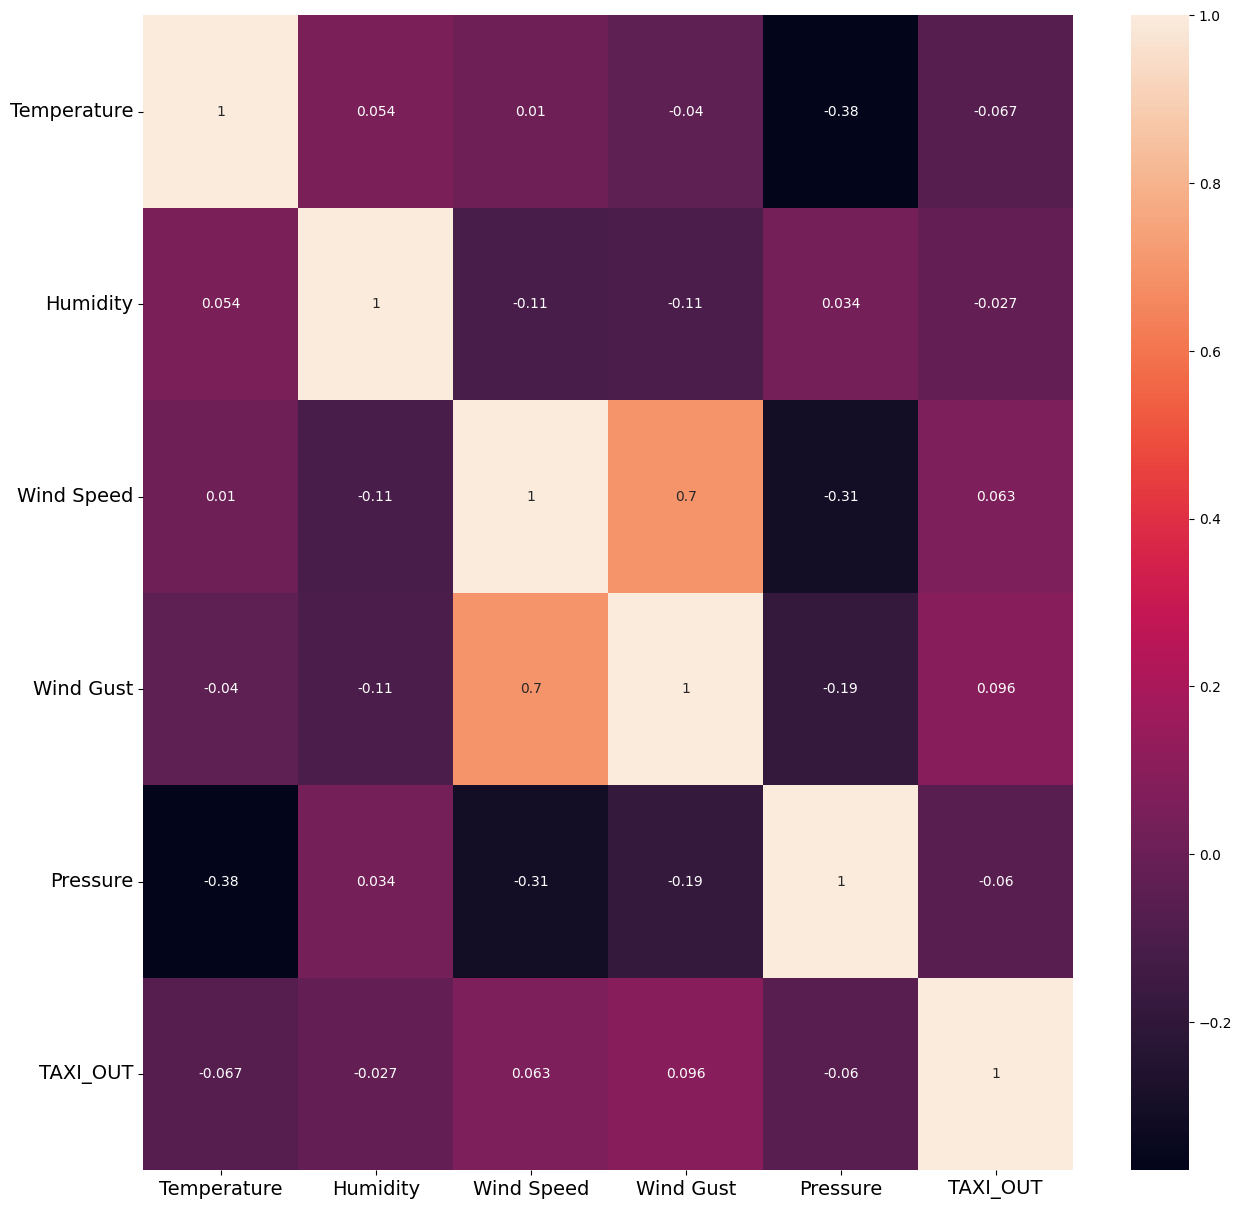

In [190]:
# Create a correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True)
plt.xticks(fontsize = 14)
plt.yticks (rotation = 'horizontal', fontsize = 14)

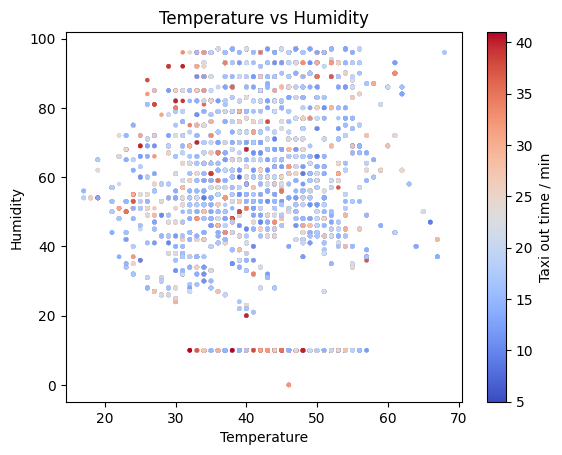

In [193]:
# Exploratory data analysis
# analyse trends between temperature, pressure, and humidity

x = jfk_data["Temperature"]
y = jfk_data["Humidity"]
z = jfk_data["TAXI_OUT"]

plt.scatter (x,y, s=5, c = z, cmap = 'coolwarm')
plt.title("Temperature vs Humidity")
plt.xlabel("Temperature")
plt.ylabel("Humidity")

cbar = plt.colorbar()
cbar.set_label("Taxi out time / min")

plt.show()

# Random relationship between temperature, humidity and taxi time


In [203]:
# bar chart with number of flights to destinations
# create a new data frame
unique_dest = jfk_data[['DEST', 'MONTH']].copy()

# Aggregate the count of flights per destination per month
dest_count = unique_dest.groupby(['DEST', 'MONTH']).size().reset_index(name='Count')


In [205]:
# Check the data matches the intended format
dest_count.head()

,DEST,MONTH,Count
0,ABQ,1,18
1,ABQ,11,20
2,ABQ,12,20
3,ATL,1,268
4,ATL,11,285


<function matplotlib.pyplot.show(close=None, block=None)>

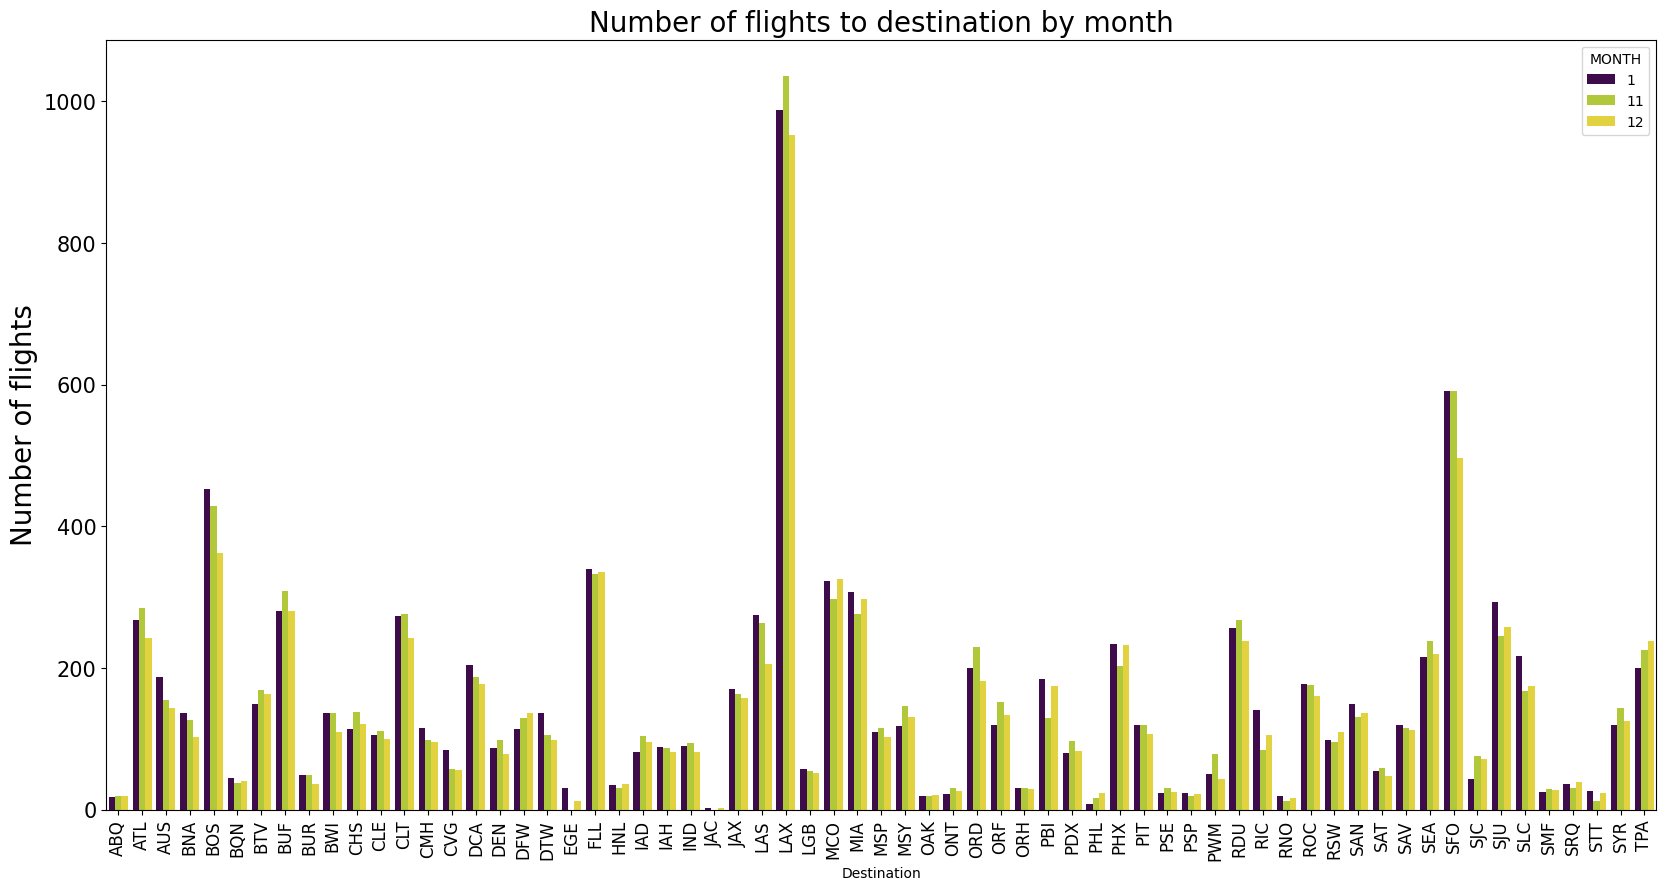

In [208]:
# Create a bar chart with the frequency of destinations
plt.figure(figsize= (20,10))

sns.barplot(data = dest_count, x='DEST', y='Count', hue = "MONTH", palette='viridis')

plt.title("Number of flights to destination by month", fontsize = 20)
plt.ylabel ("Number of flights", fontsize = 20)
plt.xlabel("Destination")
plt.yticks (fontsize = 15)
plt.xticks (rotation = 'vertical', fontsize = 12)
plt.legend(title='MONTH')
plt.show

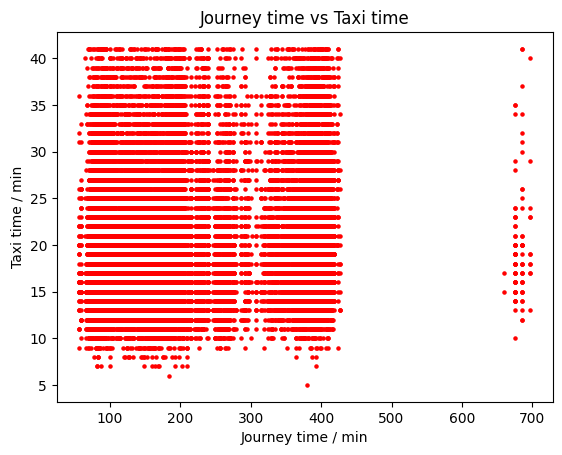

In [209]:
# plot of journey time vs taxi time
plt.scatter (jfk_data['CRS_ELAPSED_TIME'], jfk_data['TAXI_OUT'], s=5, color = 'red')
plt.xlabel("Journey time / min")
plt.ylabel("Taxi time / min")
plt.title("Journey time vs Taxi time")
plt.show()


Text(0.5, 1.0, 'Wind speed vs Taxi time')

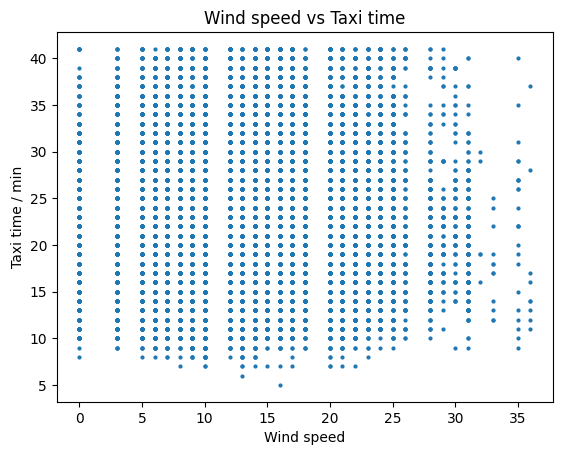

In [211]:
# Analysing wind speed vs taxi time
plt.scatter(jfk_data['Wind Speed'], jfk_data['TAXI_OUT'], s=4)
plt.xlabel("Wind speed")
plt.ylabel("Taxi time / min")
plt.title("Wind speed vs Taxi time")

In [212]:
# Build machine learning algorithm
X = jfk_data[['Temperature', 'Wind Speed']].values
Y = jfk_data['TAXI_OUT'].values

In [213]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [214]:
# Check the data
X_train

array([[46, 21],
       [50, 12],
       [53, 17],
       ...,
       [49, 14],
       [33,  3],
       [42,  6]])

In [215]:
# Train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

LinearRegression()

In [216]:
# Prediction on the test set
Y_pred = lin_reg.predict(X_test)

In [217]:
# put into a dataframe
pd.DataFrame({'Actual value': Y_test, 'Predicted value': Y_pred})

,Actual value,Predicted value
0,14,21.450718
1,25,20.514352
2,25,22.276507
3,26,21.676278
4,27,21.143276
...,...,...
5759,10,20.490269
5760,23,22.569295
5761,19,20.523985
5762,22,22.175564


In [226]:
# Evaluate the model
r2_linreg = metrics.r2_score(Y_test, Y_pred)
meanABerr_linreg = metrics.mean_absolute_error(Y_test, Y_pred)
meanSqErr_linreg = metrics.mean_squared_error(Y_test, Y_pred)
rootMeanSqErr_linreg = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))
print('R2 linreg:',r2_linreg)
print('Mean Absolute Error linreg:',meanABerr_linreg)
print('Mean Square Error linreg:',meanSqErr_linreg)
print('Root Mean Square Error linreg:',rootMeanSqErr_linreg)


R2 linreg: 0.005655276578732438
Mean Absolute Error linreg: 5.480342688799949
Mean Square Error linreg: 45.9462873335362
Root Mean Square Error linreg: 6.778369076225947


In [231]:
# using Lasso and Ridge regression to see if the model performance is improved
# start by setting alpha at 0.1

model_lasso = Lasso(alpha = 0.10)
model_ridge = Ridge (alpha = 0.10)

# using the same test set to train the model
model_lasso.fit(X_train, Y_train)
model_ridge.fit(X_train, Y_train)

Ridge(alpha=0.1)

In [229]:
# predictions on the test set
Y_pred_lasso = model_lasso.predict(X_test)
Y_pred_ridge = model_ridge.predict(X_test)

In [230]:
# put the values into a dataframe to compare predicted vs actual
pd.DataFrame({'Actual value': Y_test, 'Predicted value Lasso': Y_pred_lasso, 'Predicted value Ridge': Y_pred_ridge})
#Lasso and ridge, when alpha set at 0.1, perform similarly

,Actual value,Predicted value Lasso,Predicted value Ridge
0,14,21.429196,21.450717
1,25,20.527995,20.514352
2,25,22.231473,22.276506
3,26,21.653489,21.676277
4,27,21.140149,21.143276
...,...,...,...
5759,10,20.508949,20.490269
5760,23,22.520409,22.569293
5761,19,20.535613,20.523985
5762,22,22.140166,22.175563


In [233]:
# Evaluate the model performance with lasso and ridge

# Lasso
r2_lasso = metrics.r2_score(Y_test, Y_pred_lasso)
meanABerr_lasso = metrics.mean_absolute_error(Y_test, Y_pred_lasso)
meanSqErr_lasso = metrics.mean_squared_error(Y_test, Y_pred_lasso)
rootMeanSqErr_lasso = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_lasso))
print('R2 lasso:',r2_lasso)
print('Mean Absolute Error lasso:',meanABerr_lasso)
print('Mean Square Error lasso:',meanSqErr_lasso)
print('Root Mean Square Error lasso:',rootMeanSqErr_lasso)

# Ridge
r2_ridge = metrics.r2_score(Y_test, Y_pred_ridge)
meanABerr_ridge = metrics.mean_absolute_error(Y_test, Y_pred_ridge)
meanSqErr_ridge = metrics.mean_squared_error(Y_test, Y_pred_ridge)
rootMeanSqErr_ridge = np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_ridge))
print('R2 ridge:',r2_ridge)
print('Mean Absolute Error ridge:',meanABerr_ridge)
print('Mean Square Error ridge:',meanSqErr_ridge)
print('Root Mean Square Error ridge:',rootMeanSqErr_ridge)

R2 lasso: 0.005694512225610793
Mean Absolute Error lasso: 5.480254412827082
Mean Square Error lasso: 45.94447434829805
Root Mean Square Error lasso: 6.778235341761014
R2 ridge: 0.005655277781230761
Mean Absolute Error ridge: 5.480342685633837
Mean Square Error ridge: 45.946287277971635
Root Mean Square Error ridge: 6.77836907212728
